In [14]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv')

In [3]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


C:\Users\Jatin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

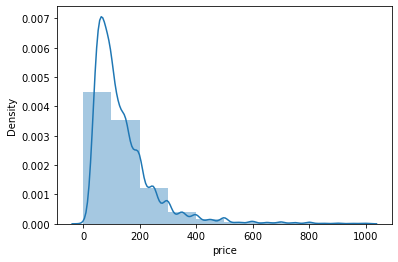

In [9]:
import seaborn as sns
sns.distplot(df[df['price']<1000]['price'],bins=10)

In [10]:
dfnew=df[['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]



In [11]:
dfnew

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,NaN,2,9
48891,40.70184,-73.93317,40,4,0,NaN,2,36
48892,40.81475,-73.94867,115,10,0,NaN,1,27
48893,40.75751,-73.99112,55,1,0,NaN,6,2


In [12]:
dfnew.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [13]:
dfnew['minimum_nights'].median()

3.0

In [28]:
# SHUFFLING DATASET
n=len(dfnew)
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [29]:
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=n-n_val-n_test

In [30]:
(n,n_val+n_test+n_train)

(48895, 48895)

In [35]:
df_train=dfnew.iloc[idx[:n_train]]

In [36]:
df_train

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30
...,...,...,...,...,...,...,...,...
14975,40.71178,-73.95779,95,2,0,NaN,1,0
14661,40.78638,-73.97004,101,30,10,0.40,1,0
24515,40.72716,-73.98524,100,3,75,3.12,1,60
31460,40.79578,-73.94523,68,2,31,2.10,1,265


In [37]:
df_val=dfnew.iloc[idx[n_train:n_train+n_val]]
df_test=dfnew.iloc[idx[n_train+n_val:]]

In [38]:
len(df_train)+len(df_val)+len(df_test)

48895

In [39]:
df_train=df_train.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)

In [40]:
y_train=np.log1p(df_train['price'])
y_val=np.log1p(df_val['price'])
y_test=np.log1p(df_test['price'])

In [41]:
del df_train['price']
del df_val['price']
del df_test['price']

In [45]:
len(y_train)+len(y_val)+len(y_test)

48895

In [46]:
df_train.iloc[10]

latitude                           40.75078
longitude                         -73.87949
minimum_nights                      1.00000
number_of_reviews                   4.00000
reviews_per_month                   2.11000
calculated_host_listings_count      4.00000
availability_365                  354.00000
Name: 10, dtype: float64

In [47]:
def dot(xi,w):
    n=len(xi)
    res=0.0
    for j in range(n):
        res=res+xi[j]*w[j]
        
    return res

In [49]:
def linear_regression(xi):
    xi=[1]+xi
    return wo+dot(xi,w)

In [50]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [54]:
X_train=df_train.fillna(0).values
X_train

array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,  0.000000e+00,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.072716e+01, -7.398524e+01,  3.000000e+00, ...,  3.120000e+00,
         1.000000e+00,  6.000000e+01],
       [ 4.079578e+01, -7.394523e+01,  2.000000e+00, ...,  2.100000e+00,
         1.000000e+00,  2.650000e+02],
       [ 4.069671e+01, -7.394896e+01,  1.000000e+00, ...,  5.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [55]:
w0,w=train_linear_regression(X_train,y_train)

In [57]:
w0,w

(-419.9126586345956,
 array([ 1.30676225e+00, -5.02167855e+00, -5.59803110e-04, -4.07634896e-04,
        -8.25470066e-03,  1.33371320e-03,  6.50203890e-04]))

In [58]:
y_pred=w0+X_train.dot(w)

In [59]:
y_pred

array([4.7827747 , 4.45947457, 4.89702083, ..., 4.82048872, 4.86944872,
       4.6161256 ])

<AxesSubplot:xlabel='price', ylabel='Count'>

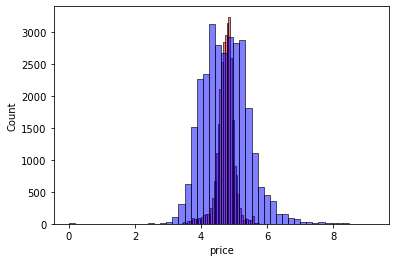

In [61]:
sns.histplot(y_pred,alpha=0.5,color='red',bins=50)
sns.histplot(y_train,alpha=0.5,color='blue',bins=50)

In [62]:
df_train.isnull().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [65]:
X_train_new=df_train.fillna(df_train['reviews_per_month'].mean()).values


array([[ 4.06435400e+01, -7.39777700e+01,  3.00000000e+00, ...,
         7.10000000e-01,  1.00000000e+00,  1.89000000e+02],
       [ 4.07066600e+01, -7.39077900e+01,  2.10000000e+01, ...,
         1.36854921e+00,  1.00000000e+00,  7.30000000e+01],
       [ 4.07611600e+01, -7.39901600e+01,  2.00000000e+00, ...,
         4.30000000e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.07271600e+01, -7.39852400e+01,  3.00000000e+00, ...,
         3.12000000e+00,  1.00000000e+00,  6.00000000e+01],
       [ 4.07957800e+01, -7.39452300e+01,  2.00000000e+00, ...,
         2.10000000e+00,  1.00000000e+00,  2.65000000e+02],
       [ 4.06967100e+01, -7.39489600e+01,  1.00000000e+00, ...,
         5.00000000e-02,  1.00000000e+00,  0.00000000e+00]])

In [66]:
w0,w=train_linear_regression(X_train_new,y_train)

In [67]:
y_pred_mean=w0+X_train.dot(w)

In [68]:
y_pred_mean

array([4.76589611, 4.44850272, 4.89107725, ..., 4.83526871, 4.87768975,
       4.60682893])

In [70]:
def rmse(y,y_pred):
    se=(y-y_pred)**2
    mse=se.mean()
    rmse=np.sqrt(mse)
    return rmse

In [71]:
rmse(y_train,y_pred)

0.6428860484860399

In [72]:
rmse(y_train,y_pred_mean)

0.6431116056663134

In [73]:
X_train_new

array([[ 4.06435400e+01, -7.39777700e+01,  3.00000000e+00, ...,
         7.10000000e-01,  1.00000000e+00,  1.89000000e+02],
       [ 4.07066600e+01, -7.39077900e+01,  2.10000000e+01, ...,
         1.36854921e+00,  1.00000000e+00,  7.30000000e+01],
       [ 4.07611600e+01, -7.39901600e+01,  2.00000000e+00, ...,
         4.30000000e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.07271600e+01, -7.39852400e+01,  3.00000000e+00, ...,
         3.12000000e+00,  1.00000000e+00,  6.00000000e+01],
       [ 4.07957800e+01, -7.39452300e+01,  2.00000000e+00, ...,
         2.10000000e+00,  1.00000000e+00,  2.65000000e+02],
       [ 4.06967100e+01, -7.39489600e+01,  1.00000000e+00, ...,
         5.00000000e-02,  1.00000000e+00,  0.00000000e+00]])

In [82]:
mean=df_train['reviews_per_month'].mean()

In [75]:
mean=df_train.

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5998
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [78]:
X_val_zero=df_val.fillna(0).values

In [79]:
w0,w=train_linear_regression(X_val_zero,y_val)

In [80]:
y_pred_zero=w0+X_val_zero.dot(w)

In [88]:
round(rmse(y_val,y_pred_zero),2)

0.64

In [83]:
X_val_mean=df_val.fillna(mean).values

In [84]:
w0,w=train_linear_regression(X_val_mean,y_val)

In [85]:
y_pred_mean=w0+X_val_mean.dot(w)

In [87]:
round(rmse(y_val,y_pred_mean),2)

0.64

In [89]:
def train_linear_regression_reg(X,y,r=0.01):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX=XTX+r*np.eye(XTX.shape[0])
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [96]:
X_train=df_train.fillna(0).values
min=88838
rval=34
for i in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    print(i)
    w0,w=train_linear_regression_reg(X_train,y_train,i)
    X_val=df_val.fillna(0).values
    y_pred=w0+X_val.dot(w)
    rmsenew=rmse(y_val,y_pred)
    print(i,rmsenew)
    if rmsenew<min:
       min=rmsenew
       rval=i
    

0
0 0.6430337788649604
1e-06
1e-06 0.6430341157340059
0.0001
0.0001 0.6430723153643697
0.001
0.001 0.6437669735254039
0.01
0.01 0.65575284274343
0.1
0.1 0.6773299642450079
1
1 0.6823116950157343
5
5 0.682791572784569
10
10 0.682843021209926


In [95]:
rval
# SHUFFLING DATASET
n=len(dfnew)
idx=np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

0

range(0, 9)

In [114]:

rmse_list=[]
seed=[0,1,2,3,4,5,6,7,8,9]
for s in seed:
    n=len(dfnew)
    idx=np.arange(n)
    print(s)
    np.random.seed(s)
    np.random.shuffle(idx)
    n_val=int(n*0.2)
    n_test=int(n*0.2)
    n_train=int(n-n_val-n_test)
    print(n_train)
    df_train=dfnew.iloc[idx[:n_train]]
    df_val=dfnew.iloc[idx[n_train:n_train+n_val:]]
    df_test=dfnew.iloc[idx[n_train+n_val:]]
    df_train=df_train.reset_index(drop=True)
    df_val=df_val.reset_index(drop=True)
    df_test=df_test.reset_index(drop=True)
    y_train=np.log1p(df_train['price'])
    y_val=np.log1p(df_val['price'])
    y_test=np.log1p(df_test['price'])
    del df_train['price']
    del df_test['price']
    del df_val['price']
    X_train=df_train.fillna(0).values
    w0,w=train_linear_regression(X_train,y_train)
    y_pred=w0+X_val.dot(w)
    rmse_score=rmse(y_val,y_pred)
    rmse_list.append(rmse_score)

0
29337
1
29337
2
29337
3
29337
4
29337
5
29337
6
29337
7
29337
8
29337
9
29337


In [117]:
round(np.std(rmse_list),3)

0.007

In [113]:
n=len(dfnew)
idx=np.arange(n)
print(s)
np.random.seed(s)
np.random.shuffle(idx)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=int(n-n_val-n_test)
print(n_train)
df_train=dfnew.iloc[idx[:n_train+1]]
print('r')

0
29337
r


In [112]:
n_train

29337.0

9
29337


In [121]:
y_train=np.log1p(df_combined['price'])
y_test=np.log1p(df_test['price'])

In [124]:
s=9
n=len(dfnew)
idx=np.arange(n)
print(s)
np.random.seed(s)
np.random.shuffle(idx)
n_val=int(n*0.2)
n_test=int(n*0.2)
n_train=int(n-n_val-n_test)
print(n_train)
df_train=dfnew.iloc[idx[:n_train]]
df_val=dfnew.iloc[idx[n_train:n_train+n_val:]]
df_test=dfnew.iloc[idx[n_train+n_val:]]
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)
df_combined=pd.concat([df_train,df_val])
del df_combined['price']
del df_test['price']
X_train=df_combined.fillna(0).values
w0,w=train_linear_regression(X_train,y_train)
y_pred=w0+X_test.dot(w)
rmse_score=rmse(y_test,y_pred)
rmse_score

KeyError: 'price'